### 一、讀入顧客的資訊(經緯度、上午與下午投遞成功的機率、單位件數)

In [1]:
import csv
import pandas as pd

In [2]:
letter = pd.read_csv('1001081_kmeans.csv')
#letter.drop( axis = 1, inplace = True)

In [3]:
letter.head()

,���X,�n��,�g��,�W�ȧ뻼���\�v,�U�ȧ뻼���\�v,���q
0,0,25.051580,121.549143,0.625000,0.702703,2014.538094
1,1,25.067000,121.577467,0.485714,0.615385,1851.774265
2,2,25.041049,121.565944,0.642857,0.606061,1074.099953
3,3,25.052859,121.530559,0.684211,0.611111,1949.750451
4,4,25.050498,121.557485,0.700000,0.500000,658.852885


###  二、將資料做清洗，併存成dictionary

In [4]:
initial=[]
for i,row in enumerate(open('1001081_kmeans.csv')):
    if i > 0:
        initial.append(row.replace('\n','').split(','))

In [5]:
customer=dict()
for i in initial:
    index=int(i[0])
    customer[index]=dict()
    customer[index]['Lat']=float(i[1])*10
    customer[index]['Long']=float(i[2])*10
    customer[index]['M_S']=float(i[3])
    customer[index]['A_S']=float(i[4])
    customer[index]['weight']=float(i[5])

### 三、將特徵值標準化，準備將顧客分群

In [6]:
from sklearn import preprocessing
import numpy as np

In [21]:
finalDF=pd.DataFrame(customer).T

In [22]:
finalDF_2 = finalDF.drop('weight',axis=1) 

In [23]:
finalDF_2

,A_S,Lat,Long,M_S
0,0.702703,250.515800,1215.491433,0.625000
1,0.615385,250.670000,1215.774667,0.485714
2,0.606061,250.410488,1215.659442,0.642857
3,0.611111,250.528588,1215.305588,0.684211
4,0.500000,250.504981,1215.574849,0.700000
5,0.571429,250.581793,1215.440138,0.709677
6,0.617647,250.416184,1215.580289,0.650000
7,0.514286,250.626500,1215.618000,0.515152
8,0.641026,250.730706,1215.759471,0.675000
9,0.638298,250.569250,1215.916750,0.641026


In [24]:
finalDF_3 = preprocessing.scale(finalDF_2)

In [25]:
finalDF_3=pd.DataFrame(finalDF_3)

In [26]:
finalDF_3

,0,1,2,3
0,1.271851,-0.058548,-0.574696,-0.014811
1,-0.144654,1.653329,1.327028,-1.982744
2,-0.295912,-1.227682,0.553370,0.237488
3,-0.213981,0.083422,-1.822519,0.821760
4,-2.016465,-0.178656,-0.014614,1.044845
5,-0.857725,0.674085,-0.919107,1.181575
6,-0.107952,-1.164449,0.021912,0.338408
7,-1.784717,1.170407,0.275115,-1.566833
8,0.271304,2.327266,1.224997,0.691626
9,0.227053,0.534836,2.281019,0.211611


### 四、利用改善過的k-means分群，且每一群的服務件數一致。

In [27]:
from clustering.equal_groups import EqualGroupsKMeans

clf = EqualGroupsKMeans(n_clusters=5)

clf.fit(finalDF_3)

clf.labels_

array([1, 3, 2, 4, 0, 0, 4, 3, 3, 3, 4, 0, 4, 3, 2, 4, 0, 4, 1, 2, 4, 4,
       4, 1, 1, 0, 1, 2, 3, 1, 0, 1, 2, 1, 2, 1, 0, 2, 3, 3, 2, 0, 0, 2])

In [ ]:
### 將結果視覺化

In [28]:
import matplotlib.pyplot as plt

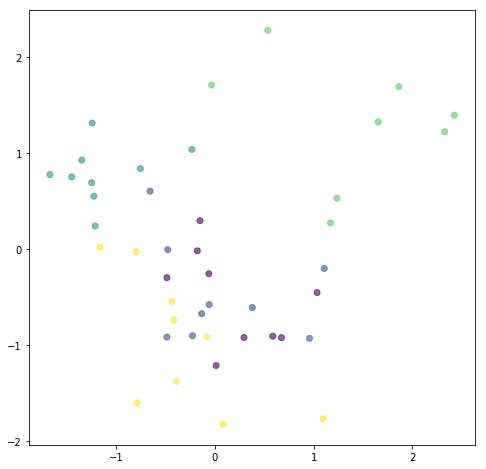

In [30]:
fig = plt.figure(figsize = (8,8))
plt.scatter(finalDF_3[1],finalDF_3[2], alpha=0.6,c=clf.labels_)  

###  ---------------------------可以不要理以下的------------------------------------

### PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(finalDF)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
principalDf

,principal component 1,principal component 2
0,-0.089176,0.012407
1,0.211920,0.098622
2,0.075072,-0.108795
3,-0.271291,0.031279
4,-0.000057,-0.019639
5,-0.132798,0.074805
6,-0.004180,-0.095931
7,0.056616,0.053725
8,0.193126,0.206032
9,0.340448,0.035937


NameError: name 'finalDf' is not defined

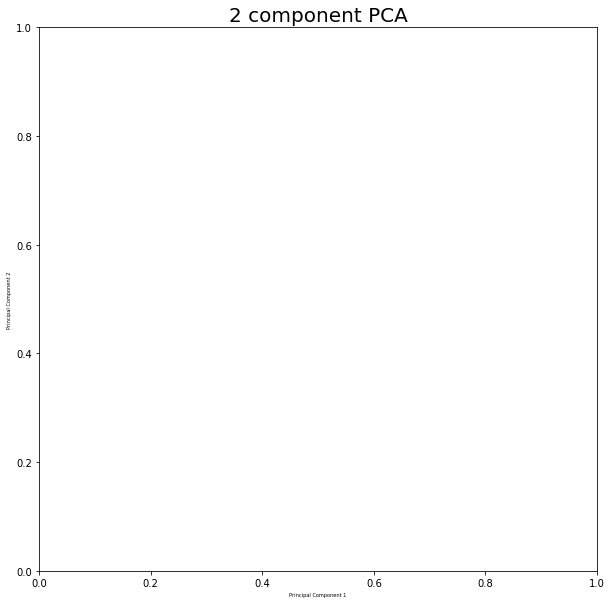

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 5)
ax.set_ylabel('Principal Component 2', fontsize = 5)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'], alpha=0.6) 

In [ ]:
finalDf_2 = pd.concat([principalDf], axis = 1)